Bu mini projede, arabaların CO2 emisyonlarını tahmin etmek için hem Statsmodel hem de Scikit-learn'de SLR ve MLR modelleri oluşturacaksınız. 



SLR yaparken Engine Size(L) ve CO2 Emissions(g/km) columnlarını kullanacaksınız.



MLR Engine Size(L), Fuel Consumption Comb (L/100 km), Fuel Consumption Hwy (L/100 km), Fuel Consumption City (L/100 km), CO2 Emissions(g/km) columnlarını kullanacaksınız.

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats 
from scipy.stats import skew
import scipy.stats as stats
import missingno as msno

plt.rcParams["figure.figsize"] = (10, 6)

import warnings
warnings.filterwarnings("ignore")

In [45]:
df = pd.read_csv('/home/evliya/Projects/MACHINE_LEARNING/co2.csv', header=0)

In [46]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [47]:
# if any null values in dataset
df.isna().any()

Make                                False
Model                               False
Vehicle Class                       False
Engine Size(L)                      False
Cylinders                           False
Transmission                        False
Fuel Type                           False
Fuel Consumption City (L/100 km)    False
Fuel Consumption Hwy (L/100 km)     False
Fuel Consumption Comb (L/100 km)    False
Fuel Consumption Comb (mpg)         False
CO2 Emissions(g/km)                 False
dtype: bool

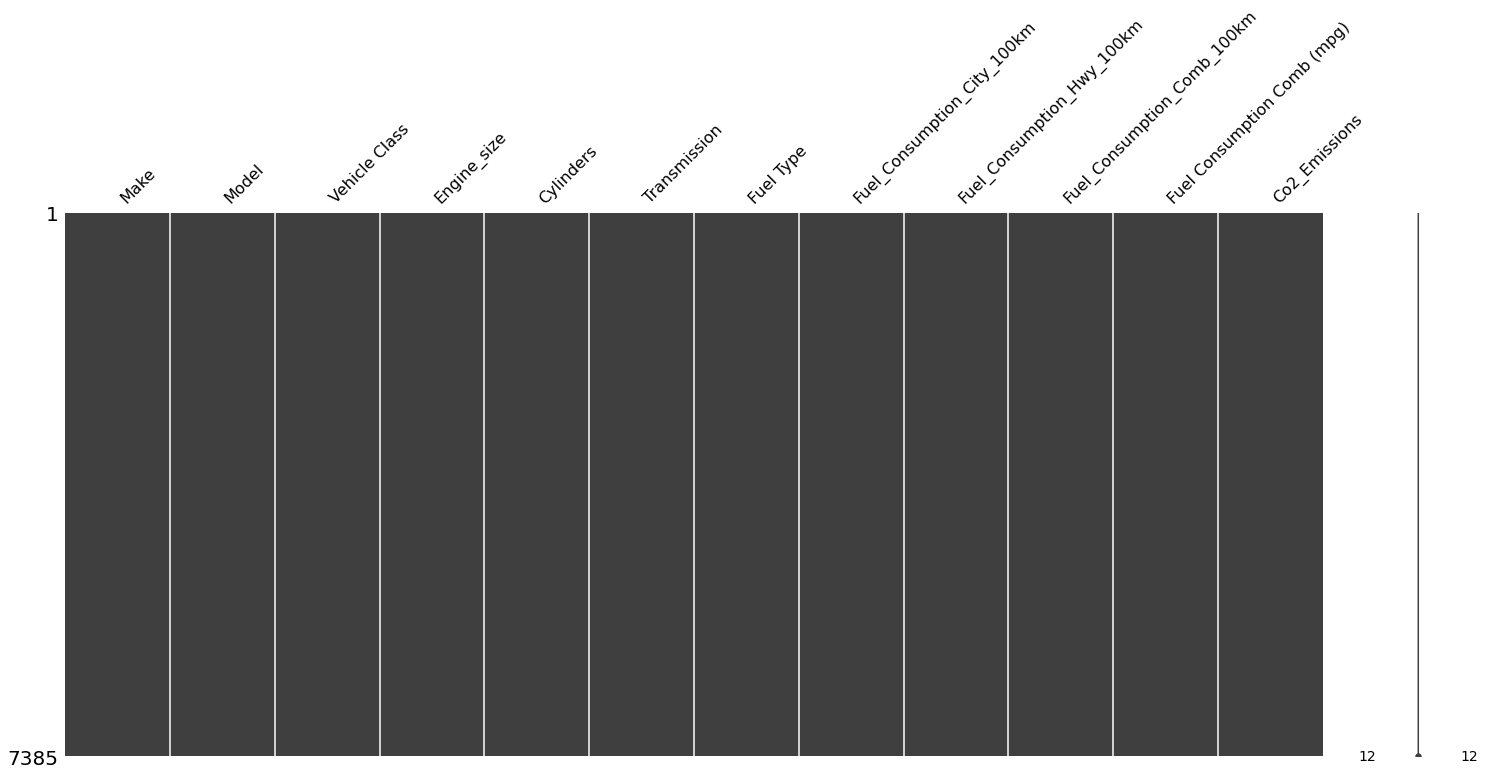

In [64]:
msno.matrix(df);

In [65]:
df.rename(columns={'Engine Size(L)': 'Engine_size', 'Fuel Consumption City (L/100 km)': 'Fuel_Consumption_City_100km', 'Fuel Consumption Hwy (L/100 km)': 'Fuel_Consumption_Hwy_100km', 'Fuel Consumption Comb (L/100 km)': 'Fuel_Consumption_Comb_100km', 'CO2 Emissions(g/km)': 'Co2_Emissions'},
         inplace = True)

In [66]:
df_1 = df[["Engine_size", "Co2_Emissions"]]

In [67]:
df_1.sample(5)

,Engine_size,Co2_Emissions
2516,3.6,240
711,2.0,161
6079,3.5,189
2264,4.0,337
5655,5.3,290


In [68]:
df_1.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine_size,7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
Co2_Emissions,7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


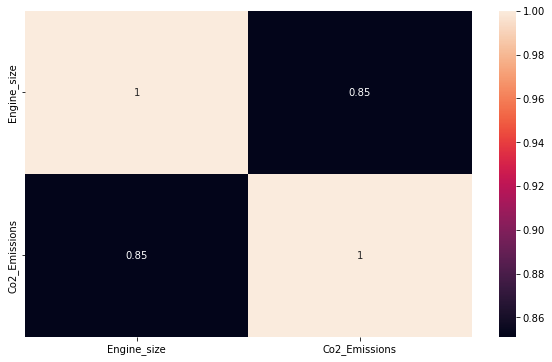

In [69]:
sns.heatmap(df_1.corr(), annot = True);

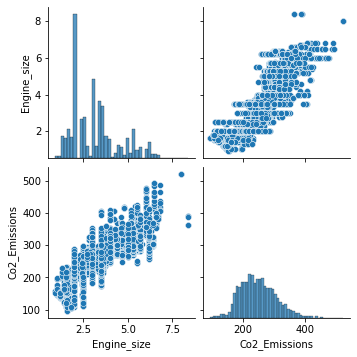

In [70]:
sns.pairplot(df_1);

In [81]:
df_1.corr()

,Engine_size,Co2_Emissions
Engine_size,1.000000,0.851145
Co2_Emissions,0.851145,1.000000


<AxesSubplot:xlabel='Engine_size', ylabel='Co2_Emissions'>

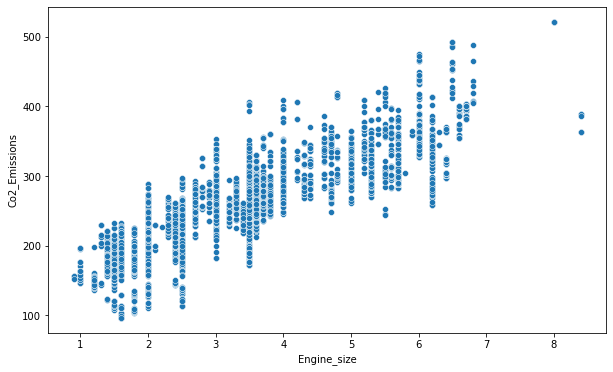

In [82]:
sns.scatterplot(x = 'Engine_size',
                y = 'Co2_Emissions',
                data = df)

<AxesSubplot:xlabel='Engine_size', ylabel='Co2_Emissions'>

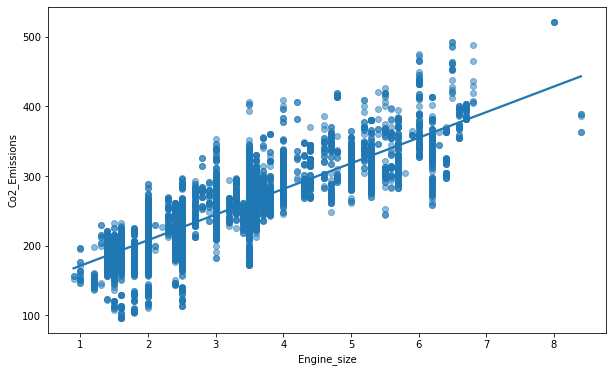

In [83]:
sns.regplot(x='Engine_size',
            y='Co2_Emissions', 
            data = df,
            ci=None,
            scatter_kws={'alpha': 0.5})

In [84]:
corr = df.Co2_Emissions.corr(df.Engine_size)
corr

0.8511446437900007

In [85]:
r2_score = corr**2
r2_score

0.7244472046524071

In [86]:
X = df["Engine_size"]
y = df["Co2_Emissions"]

In [87]:
np.polyfit(X, y, deg=1)

array([ 36.77731519, 134.36589272])

In [78]:
slope, intercept = np.polyfit(X, y, deg = 1)

In [79]:
print("slope       : ", slope)
print("intercept   : ", intercept)

slope       :  36.77731518641954
intercept   :  134.365892723495


In [80]:
b1, b0 = np.polyfit(X, y, deg = 1)

In [36]:
print("b1    :", slope)
print("b0      :", intercept)

b1    : 36.77731518641954
b0      : 134.365892723495


In [37]:
y_pred = b1*X +b0
y_pred

0       207.920523
1       222.631449
2       189.531866
3       263.086496
4       263.086496
           ...    
7380    207.920523
7381    207.920523
7382    207.920523
7383    207.920523
7384    207.920523
Name: Engine_size, Length: 7385, dtype: float64

In [90]:
values = {"actual":y, "predicted":y_pred, "residual":y-y_pred, "LSE": (y-y_pred)**2}
df_result = pd.DataFrame(values)
df_result

,actual,predicted,residual,LSE
0,196,207.920523,-11.920523,142.098871
1,221,222.631449,-1.631449,2.661626
2,136,189.531866,-53.531866,2865.660624
3,255,263.086496,-8.086496,65.391416
4,244,263.086496,-19.086496,364.294325
...,...,...,...,...
7380,219,207.920523,11.079477,122.754808
7381,232,207.920523,24.079477,579.821208
7382,240,207.920523,32.079477,1029.092838
7383,232,207.920523,24.079477,579.821208


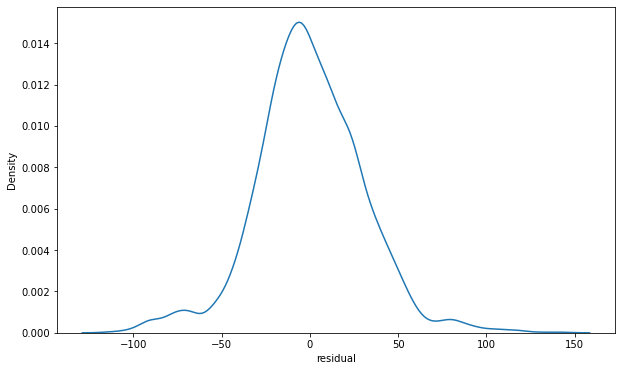

In [93]:
sns.kdeplot(df_result['residual']);

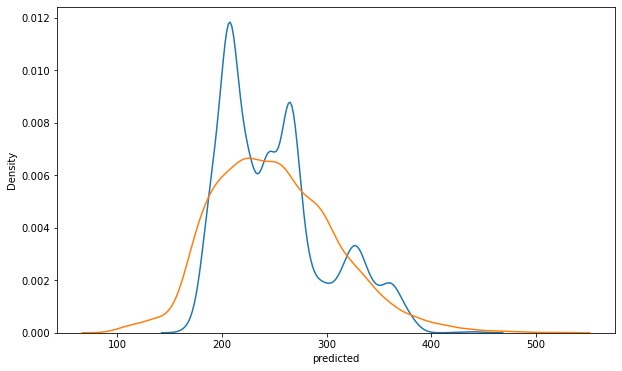

In [116]:
sns.kdeplot(df_result['predicted']);
sns.kdeplot(df_result['actual']);

## Multiple Linear Regression

In [96]:
df.head()

,Make,Model,Vehicle Class,Engine_size,Cylinders,Transmission,Fuel Type,Fuel_Consumption_City_100km,Fuel_Consumption_Hwy_100km,Fuel_Consumption_Comb_100km,Fuel Consumption Comb (mpg),Co2_Emissions
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [97]:
df_2 = df[["Engine_size", "Fuel_Consumption_City_100km", "Fuel_Consumption_Hwy_100km", "Fuel_Consumption_Comb_100km", "Co2_Emissions"]]

In [98]:
df_2.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine_size,7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
Fuel_Consumption_City_100km,7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
Fuel_Consumption_Hwy_100km,7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
Fuel_Consumption_Comb_100km,7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
Co2_Emissions,7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


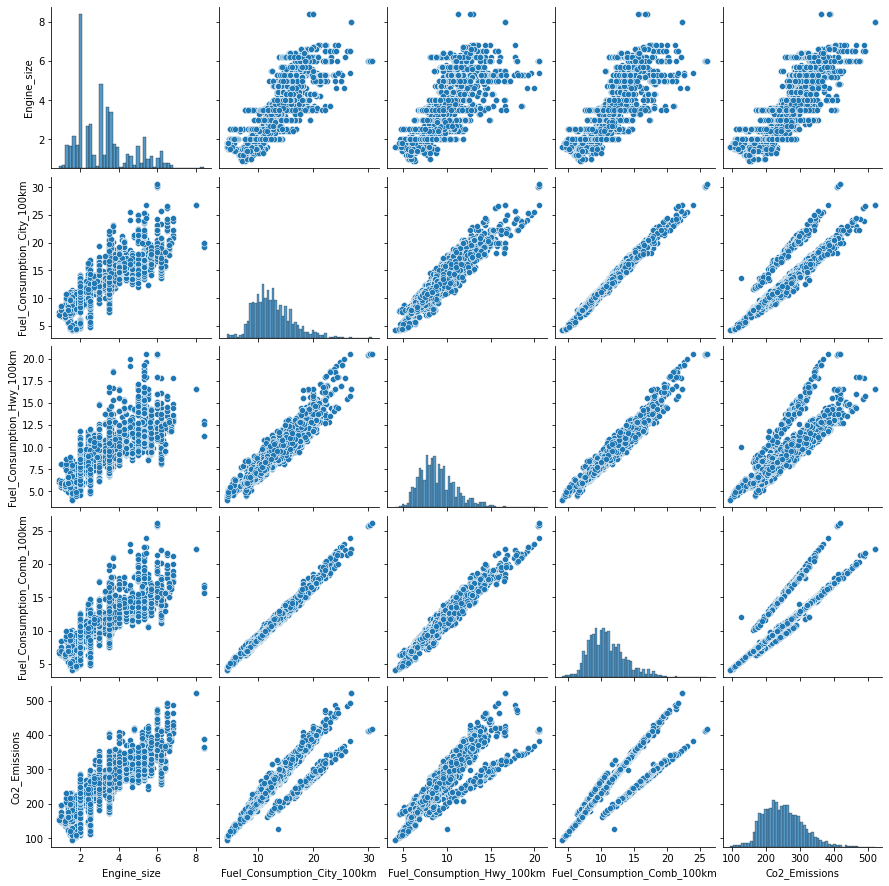

In [99]:
sns.pairplot(df_2);

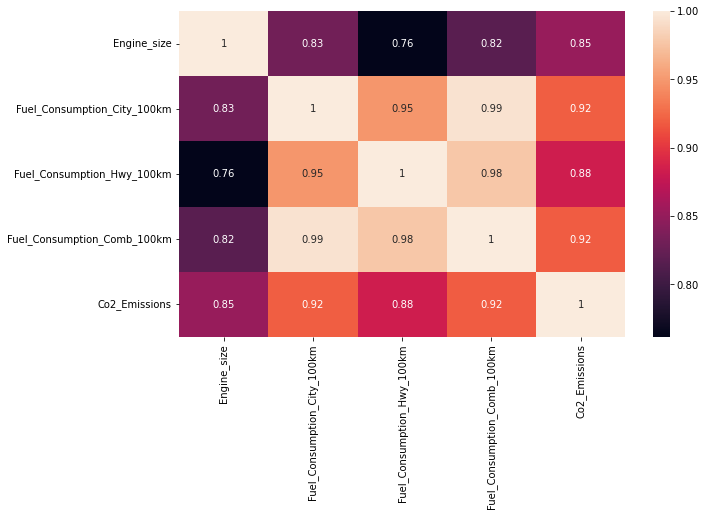

In [100]:
sns.heatmap(df_2.corr(), annot = True);

In [101]:
for i in df_2.drop(columns = "Co2_Emissions").columns:
    print(i, skew(df[i]))

Engine_size 0.8090166237091084
Fuel_Consumption_City_100km 0.8088403827811873
Fuel_Consumption_Hwy_100km 1.078997475325438
Fuel_Consumption_Comb_100km 0.8931342662031229


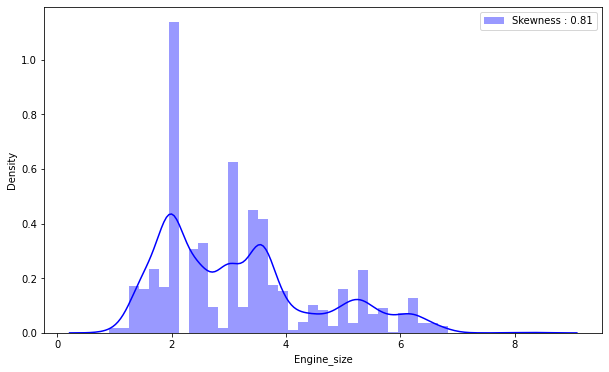

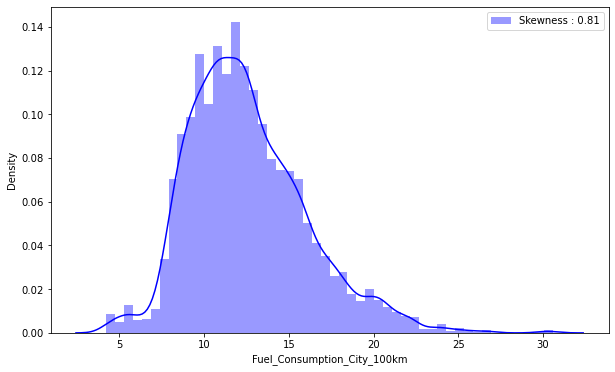

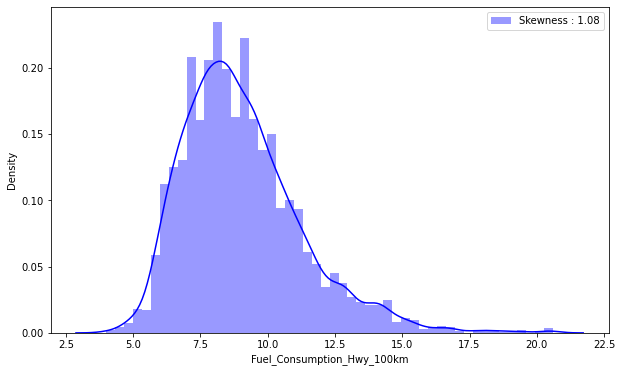

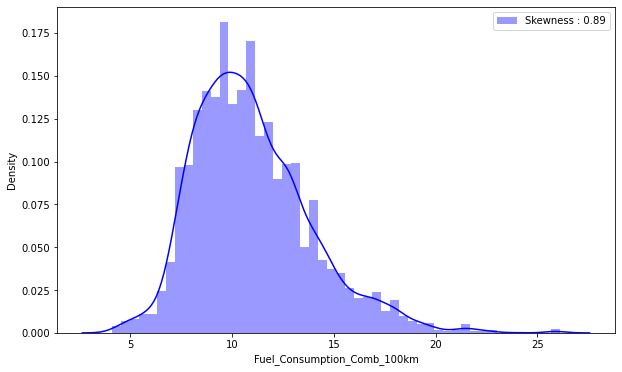

In [102]:
for j in df_2.drop(columns = "Co2_Emissions").columns:
    g = sns.distplot(df[j], color = "b", label = "Skewness : %.2f"%(df[j].skew()))
    g = g.legend(loc = "best")
    plt.show()

In [104]:
#Test-Train Split

df_2.shape   #If the dataset between 1000-100.000, we will conduct %10-20 test, %90-80 train.

(7385, 5)

In [106]:
X = df_2.drop(columns = "Co2_Emissions")

y = df_2["Co2_Emissions"]

print(X, y)

      Engine_size  Fuel_Consumption_City_100km  Fuel_Consumption_Hwy_100km  \
0             2.0                          9.9                         6.7   
1             2.4                         11.2                         7.7   
2             1.5                          6.0                         5.8   
3             3.5                         12.7                         9.1   
4             3.5                         12.1                         8.7   
...           ...                          ...                         ...   
7380          2.0                         10.7                         7.7   
7381          2.0                         11.2                         8.3   
7382          2.0                         11.7                         8.6   
7383          2.0                         11.2                         8.3   
7384          2.0                         12.2                         8.7   

      Fuel_Consumption_Comb_100km  
0                          

In [117]:
from sklearn.model_selection import train_test_split

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [121]:
print("X Train features shape: {}\ny Train features shape: {}\nX Test features shape : {}\ny Test features shape : {}".format
      (X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X Train features shape: (5908, 4)
y Train features shape: (5908,)
X Test features shape : (1477, 4)
y Test features shape : (1477,)


In [123]:
#Model Fitting
from sklearn.linear_model import LinearRegression

In [125]:
lg = LinearRegression() 

In [126]:
lg.fit(X_train, y_train)

LinearRegression()

In [127]:
y_pred = lg.predict(X_test)
y_pred

array([247.46242188, 318.00782197, 330.68063281, ..., 184.91772376,
       244.98292627, 198.69080316])

In [128]:
lg.coef_

array([12.76444704,  2.50397545,  0.51884685, 10.27807703])

In [129]:
lg.intercept_

61.41912389764826

In [130]:
my_dict = {"Actual": y_test, "pred": y_pred, "residual": y_test - y_pred}

In [134]:
comparing = pd.DataFrame(my_dict)
result = comparing.sample(25)

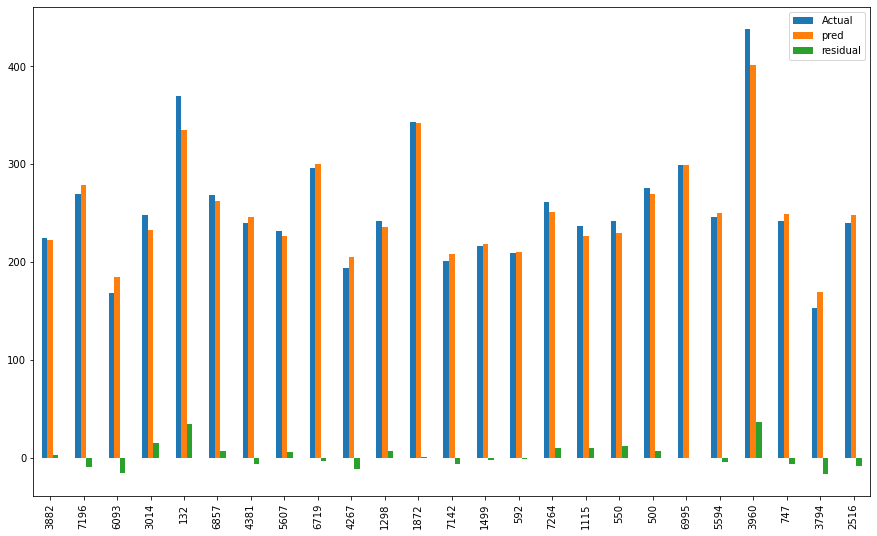

In [135]:
result.plot(kind= "bar", figsize = (15,9))
plt.show()

In [137]:
#Error Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [138]:
r2_score = r2_score(y_test, y_pred)
r2_score

0.8713608880187578

In [139]:
mae = mean_absolute_error(y_test, y_pred)
mae

13.51915444745603

In [140]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

21.034985527732943

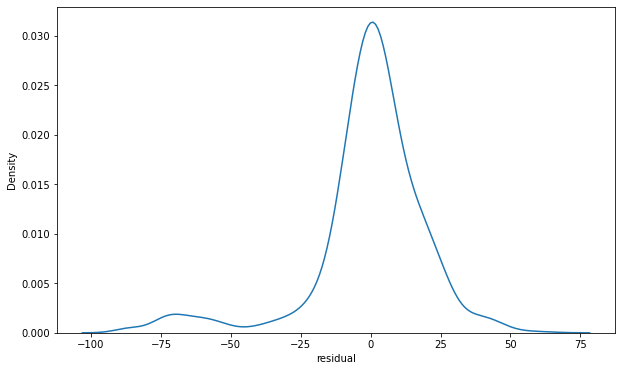

In [143]:
sns.kdeplot(comparing['residual']);

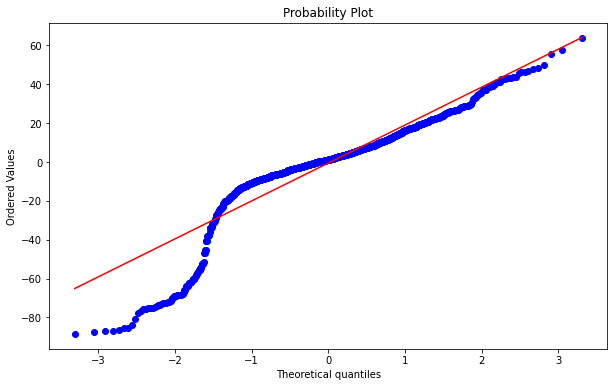

In [144]:
stats.probplot(comparing['residual'], dist = "norm", plot = plt);

In [146]:
skew(comparing['residual'])

-1.5167482617615153

In [148]:
from yellowbrick.regressor import ResidualsPlot

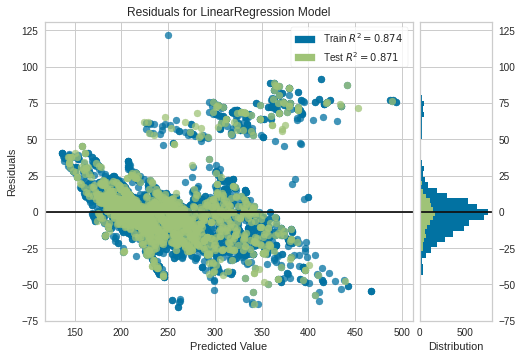

In [149]:
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.show();       

In [151]:
from yellowbrick.regressor import PredictionError

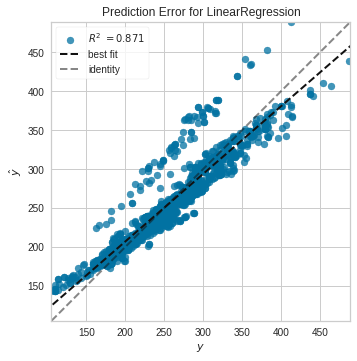

In [152]:
model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.show();  

## Coefficients

In [153]:
final_model = LinearRegression()
final_model.fit(X, y)

LinearRegression()

In [154]:
final_model.coef_

array([12.83782801,  2.97503146,  0.83187809,  9.4575278 ])

In [155]:
coeff_df = pd.DataFrame(final_model.coef_, index = X.columns, columns = ["Coefficient"] )
coeff_df

,Coefficient
Engine_size,12.837828
Fuel_Consumption_City_100km,2.975031
Fuel_Consumption_Hwy_100km,0.831878
Fuel_Consumption_Comb_100km,9.457528


In [168]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % lg.score(X, y))

Variance score: 0.87


## Conclusion
### We were successfully able to predict the CO2 Emissions for the current dataset with 86% accuracy. The best possible score we could have for the Variance is 1, the lower the value, the worse your prediction is. Here we have an 86% accuracy rate which I am happy about.

### Alternatively, one may use Polynomial Regression or Simple Linear Regression models; however, I found Multiple Regression giving better accuracy results

## Thank you!